# THE SPARKS FOUNDATION 

# NAME: Sarvesh Kapse

# Task - 1 : Prediction using Supervised ML
Predict the percentage of marks of an student based on the number of study hours.

# STEP 1 - Importing libraries and dataset

In [3]:
#Importing required librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#Reading data from the given link 
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")


In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# STEP 2- Visualizing the data

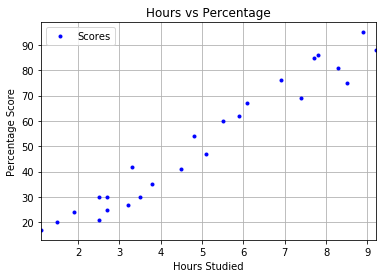

In [6]:
df.plot(x='Hours', y='Scores', style='.', color='blue')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# STEP 3 - Preparing the data & Splitting the dataset

In [28]:
X = df.iloc[:, :-1].values  
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [29]:
y = df.iloc[:, 1:].values  
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [12]:
# Splitting data into training data and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# STEP 4 - Training the Algorithm

We have splited our data into training and testing sets, and now we will train our Model.

In [13]:
from sklearn.linear_model import LinearRegression  

l = LinearRegression()  
l.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Try to divide the data in array or else you will get Expected 2D array, got 1D array instead.

In [14]:
# print coefficient and intercepts model
l.coef_

array([[9.91065648]])

In [15]:
l.intercept_

array([2.01816004])

# STEP 5 - Visualizing the model


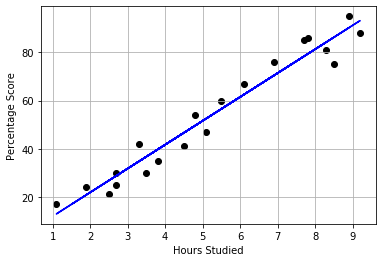

In [17]:

# Plotting the regression line
line = l.coef_*X+l.intercept_

# Plotting for the test data
plt.show()
plt.scatter(X_train, y_train, color='black')
plt.plot(X, line, color='blue');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

# STEP 6 - Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [18]:
print(X_test)
y_pred = l.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
#Comparing actual and predicated values of a dataframes
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [26]:
#Testing 
hours = 9.25
own_pred = l.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


# STEP 7 - Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
